# Preliminaries

This chapter introduces the basic concept of the finite difference formula, which can be used to obtain a numeric estimate of the slope of a curve. After completing this chapter you should be able to:

* Compute a numeric estimate of the derivative from a set a datapoints representing a function

* Understand how the accuracy of the result may be affected by both mathematical and computer errors


## Estimating slope of a curve

We can obtain an approximation to a curve by joining up a set of points with straight lines. This is known as a "linear interpolation". It is the approach we use to plot curves on the computer. For example, the following code produces a plot of $y=x^2$, using 30 data points connected by straight lines.

```{code}
import matplotlib.pyplot as plt
import numpy as np

n=30 # number of data points
x=np.linspace(-3,3,n)
y=x**2

plt.plot(x,y)
plt.show()
```

In the animation below this code has been adapted to illustrate how the interpolation appears smoother and more representative of the function as we use a greater number of datapoints in the interval. Essentially, the discrete function approaches a continuous one in the limit:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams.update({'font.size': 14})

vals = range(5,30,2)

fig = plt.figure(figsize=(6,3))
ax = plt.axes(xlim =(-3, 3),ylim =(-1, 7))
line, = ax.plot([], [], lw = 2)
text = ax.text(0, 6,'',horizontalalignment='center',)
plt.close()

def init():
	return (line,text)

# animation function
def animate(i):
	x = np.linspace(-3,3,vals[i])
	y=x**2
	line.set_data(x, y)
	text.set_text('n = %1.0d' % vals[i])
	return (line,text)

# calling the animation function
anim = animation.FuncAnimation(fig, animate,
							init_func = init,
							frames = len(vals),
							interval = 200,
							blit = True)

# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim

We can use the linear interpolation to estimate the slope of the curve at each datapoint. The formula can be written mathematically by labelling the points as

\begin{equation}
(x_k,y_k), \qquad k=1,2,\dots n.
\end{equation}

The slope of a particular line segment is then given by

```{math}
:label: fd-init
s_k = \left[\frac{\Delta y}{\Delta x}\right]_k = \frac{y_{k+1}-y_k}{x_{k+1}-x_k}.
```

Writing this out for each line segment provides a numeric (difference) estimate of the derivative at each point:

```{math}
:label: thebasic
y^{\prime}=\biggr[\frac{y_2-y_1}{x_2-x_1},\frac{y_3-y_2}{x_3-x_2},\dots,\frac{y_n-y_{n-1}}{x_n-x_{n-1}}\biggr]
```

In python, we can implement the difference formula using the `diff` function, which gives the differences between neighbouring values in an array. 

```{warning}
Notice that with $n$ data points we can only find the slope at the first $(n−1)$ points, because the forward projection of the function at the final point is not known. If we wish to obtain the slope at $x_n$, we require the exterior value $(x_{n+1},y_{n+1})$.
```

### Example

In the following example the difference formula is utilised with $n=100$ datapoints on the interval $x\in[-\pi,\pi]$ to find the slope of the function

\begin{equation*}
y(x)=\sin(x)+x.
\end{equation*}

First we generate the dataset, using either `linspace` or `arange` to create an array of equally spaced datapoints:

```{code}
from numpy import pi, linspace, sin, arange

# generate n=100 datapoints on the interval
x=linspace(-pi,pi,100) 
#x=arange(-pi,pi,2*pi/99) #equivalent
y=sin(x)+x
```

Next we apply the difference formula:

```{code}
from numpy import diff
yd=diff(y)/diff(x)
```

````{note}
In our example dataset the points are equally spaced on the $x$-axis and so the value $(x_{k+1}-x_k)$ is constant. Consequently, we could replace `diff(x)` by the common difference $h$, which may be calculated from the first two values:

```{code}
h=x[1]-x[0]; #see below comment on indexing
yd=diff(y)/h
```
````


We now have an estimate of the derivative at every datapoint $x_k$ apart from the last, and so we can plot our result as follows:

```{code}
plt.plot(x[0:-1],yd) #see below comment on slicing
plt.show()
```

```{image} images/first_derivative.png
:alt: slope-estimate
:width: 60%
:align: center
```

(guru1)=
### For Python gurus

**Indexing** techniques use the position of items in list or array to access their values. In Python indexing starts from 0, so for a given array `x`,
* `x[0]` refers to the first value. 
* `x[1]` refers to the second value. 

We can use indexing as an alternative to the `diff` function to obtain an array of differences by looping over the elements based on their position:

```{code}
n = len(y)       #number of elements in y
yd = np.empty(n) #placeholder list

for k in range(n-1):
    yd[k]=(y[k+1]-y[k])/(x[k+1]-x[k])
```

**Slicing** techniques are used to obtain a whole set of values from a list or array. For example, `x[1:10]` gets the values from array `x` that are in positions 1 through to 9. 

* If the stopping index is not included then all of the values to the right of the starting index are included. For example, `x[1:]` gets everything except the first value.

* If a negative index is used this refers to the position counted from the end of the list instead of the start of the list. For instance, `x[0:-1]` gets everything except the last value.

Slicing allows us to generate the array of differences without using a loop. We first note that formula {eq}`thebasic` can be written as

\begin{equation}
y^{\prime}=\frac{[y_2,y_3,\dots,y_n]-[y_1,y_2,\dots,y_{n-1}]}{[x_2,x_3,\dots,x_n]-[x_1,x_2,\dots,x_{n-1}]}
\end{equation}

This can be coded as follows:

```{code}
ydiff = y[1:]-y[0:-1]
xdiff = x[1:]-x[0:-1]
yd = ydiff/xdiff
```

## Relation to derivative

By introducing $h_k=(x_{k+1}-x_k)$ the finite difference formula {eq}`fd-init` may be written as

```{math}
:label: eq-fdiff1
s_k = \frac{y(x_k+h_k)-y(x_k)}{h_k}.
```

As we allow $h_k$ to approach zero the finite difference estimate should approach the continuous analytic result for the derivative (in the limit).

```{note}
In the work that follows we will always assume that the step sizes $h_k$ are constant and so we will dispense with the subscript $k$ on this parameter.
```

### Example

Taking $y=\sin(x)$ in the finite difference formula {eq}`eq-fdiff1` gives us an approximation for the derivative of this function:

\begin{equation}y^{\prime}(x_k)\approx \frac{\sin\left(x_k+h\right)-\sin\left(x_k\right)}{h}.\end{equation}

We can estimate the error in this approximation at any given point by comparing to the known analytic result $y^{\prime}=\cos(x)$. For example, with $x_k=\pi/3$ and $h=0.1$ :

In [2]:
from numpy import pi, sin, cos, abs

xk=pi/3; h=0.1           #chosen values
d=(sin(xk+h)-sin(xk))/h  #numeric estimate
e=abs(d-cos(xk))          #error
print(e)     

0.04409811458923907


By adjusting the value of the step size $h$ you can start to see how the accuracy of the result is affected. For instance, making the step size ten times smaller results in an error that is also around ten times smaller. The plot below illustrates how the error changes with the step size for $x_k=\pi/3$.

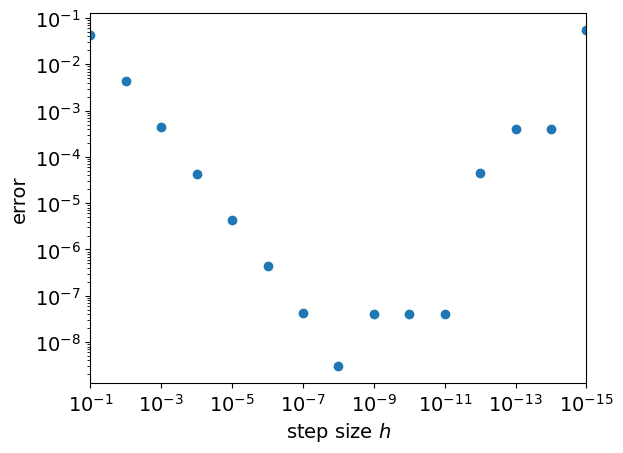

In [3]:
import numpy as np
import matplotlib.pyplot as plt

xk=pi/3                         #location

y = lambda x: sin(x)           #function to be differentiated
yp= lambda x: cos(x)           #analytic result
                               #(see below comment on lambda functions)
h=np.logspace(-1,-15,num=15)   #array of h values
#j=arange(1, 15, 1) 
#h=10.0 ** -j                  #alternative way to create h
d = (y(xk + h) - y(xk))/h      #finite difference formula
e = abs(d-yp(xk))              #error in estimate
plt.loglog(h,e,'o')            #Log-Log scale

plt.xlim(max(h),min(h))        #reverse x axis
plt.xlabel("step size $h$")
plt.ylabel("error")
plt.show()

Notice that the size of the error is linearly proportional to the step size $h$, down to around $h=10^{-8}$. We expected that shrinking $h$ would reduce the error, but might not have anticipated that the relationship would be linear. Changing the function $f(x)$ or the value $x_k$ will not affect this finding, which will be explained in the next chapter.

For step sizes smaller than $10^{-8}$ the error starts to grow again or behave unpredictably. This is not a mathematical error, but is due to roundoff errors that occur due to the way that computers handle numeric calculations, as outlined in {numref}`rounderr`.

### For Python gurus

The **def** keyword allows you to create functions that take a given input (or inputs) and return a calculated output. For instance, we can define the function and its derivative:

```{code}
def y(x):
    return sin(x)

def yp(x):
    return cos(x)
```
Once we have created these definitions we can use them in our further calculations like any other function.

**Lambda functions** provide an alternative shorthand way to create a function definition. They should normally be used only for simple one-step manipulations:

In [4]:
y = lambda x: sin(x)
yp= lambda x: cos(x)

The functions that we create can be much more complicated than these examples. They can have more than one input/output, and their construction can contain several lines of code. For example, the following function can be used to numerically differentiate a given function $f(x)$ on a specified interval:

In [5]:
def fdiff(f,xRange,h=1e-3):
    
    #Construct datapoints (x,y=f(x))
    xmin,xmax=xRange
    stop=xmax+2*h               #add right exterior point
    x = np.arange(xmin,stop,h)  #stop value is not included
    y = f(x)

    #Apply finite difference formula
    ydiff = y[1:]-y[0:-1]
    xdiff = x[1:]-x[0:-1]
    yd = ydiff/xdiff
    
    #Datapoints of func and derivative
    return x[0:-1],y[0:-1],yd

The function has been constructed so that the common step size $h$ can be defined by the user, but defaults to `h=1e-3`. There are three outputs, which are the values of $x$, $f(x)$ and the numeric estimate of $f^{\prime}(x)$.

An example usage of the function is shown below, for the case where $f(x)=\sin(x)$, using the default step size.

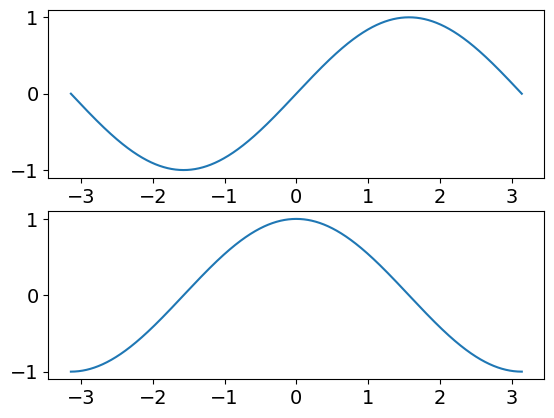

In [6]:
myf = lambda x: sin(x)
x,y,yd=fdiff(myf,[-pi,pi])

fig, ax = plt.subplots(2,1)
ax[0].plot(x,y)
ax[1].plot(x,yd)
plt.show()

````{note}
When calling a function, the positional order of the inputs must match that of the function definition. For instance, our `fdiff` function expects the arguments to be in the order `f`,`xRange`,`h`.

However, it is possible to lift the restriction on argument order by using the function's **keywords** to specify the arguments. For instance, we can write

```{code}
x,y,yd=fdiff(xRange=[-pi,pi],f=myf)
```

````


(rounderr)=
### Roundoff errors

In most computers and software applications, numbers are stored in computer memory using either a 32 bit or a 64 bit binary representation. The latter, which is used by Python's `float` is roughly equivalent to 16 significant digits of decimal precision. As a result, the difference between two numbers that are very close together may be computed inaccurately.

```{admonition} See also
:class: readmore
A description of the issues and limitations can be found in the Python documentation on [Floating Point Arithmetic](https://docs.python.org/3/tutorial/floatingpoint.html). The terminology refers to the fact that there isn't a fixed number of digits either side of the point separating the integer part of the number from its fractional part, so the point can "float" during calculation.
```

For this example, at step size $h=10^{-9}$ the difference between the two sine terms can be accurately computed (using high precision arithmetic) as

\begin{equation}\sin(x_k+10^{-9})-\sin(x_k) = 4.999999995669873\times 10^{-10}\end{equation}

However, with the precision available to `float` it is determined to be
\begin{equation}\sin(x_k+10^{-9})-\sin(x_k) = 5.000000413701855\times 10^{-10}\end{equation}

The difference occurs in the seventh significant figure and this explains why the error in the computed answer is around $10^{-7}$

We can eliminate roundoff errors by increasing the number of digits used in internal computations to obtain a graph like the one below, in which the errors are seen to continue decreasing linearly for smaller step sizes.

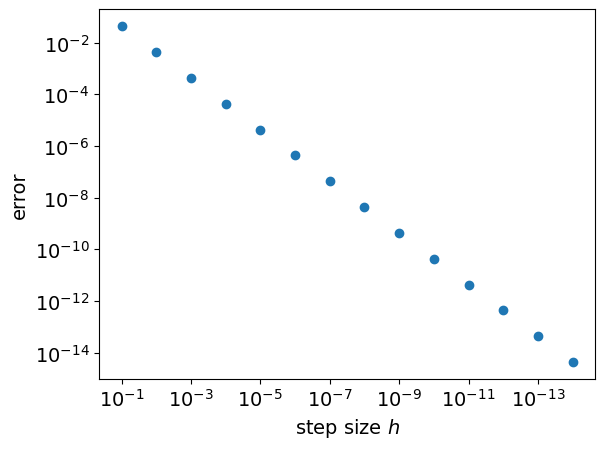

In [7]:
import mpmath as mp
import matplotlib.pyplot as plt
mp.dps = 15;
h=[10.0**-n for n in range(1,15)]
e=[mp.cos(mp.pi/3)-mp.diff(mp.sin,mp.pi/3,h=10.0**-n, direction=1) for n in range(1,15)]
plt.loglog(h,e,'o')

plt.xlabel("step size $h$")
plt.ylabel("error")
plt.gca().invert_xaxis()
plt.show()

```{admonition} Why we won't be using higher precision arithmetic
:class: danger
Using higher precision arithmetic is computationally **very** costly, and in scientific calculations this is usually important. It is common for research calculations to take hours or days to evaluate on a supercomputer. With high precision arithmetic the same problems could take weeks, months, or even centuries!

Therefore higher precision arithmetic is not normally a "good" way to solve numeric problems. We want the computer to work smarter, not harder. We will develop more efficient algorithms that can give the results we require using `float` arithmetic.

*Additional note*: Whilst higher precision is always nice to have, it may not always be required. Here we were already able to straightforwardly obtain around five or six digits of accuracy in the solution, which is enough for many problems.
```

(chapex1)=
## Chapter exercise 

The logistic function is given by the following expression in which parameters $t_0$, $C$, $r$ are constants determining the location, scale and shape of the curve:

\begin{equation}
x=\frac{C}{1+e^{-r(t-t_0)}}.
\end{equation}

Produce a plot of the function using a step size `h=1e-3` for the case where $t_0=3$, $C=75$, $r=1.5$, Use the difference formula to estimate the first and second derivatives numerically.

```{warning}
Repeated application of the first derivative formula to calculate higher derivatives gives results that are progressively worse (and probably less smooth). In the next chapter we will look at a better method to calculate higher derivatives.
```